In [57]:
# 플롯 스타일 설정
sns.set(font_scale=1.2)
plt.style.use("ggplot")


In [11]:
# 데이터 불러오기
test = pd.read_csv('./datas/test.csv')
train = pd.read_csv('./datas/train.csv')
sample_submission = pd.read_csv('./datas/sample_submission.csv')
dfs = [test, train]

In [7]:
print(train.shape)
print(test.shape)

(250000, 102)
(150000, 101)


In [8]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [9]:
test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [12]:
print(train.shape)
for df in dfs:
    df.drop(['id'], axis = 1, inplace = True)
print(train.shape)

(250000, 102)
(250000, 101)


In [16]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [29]:
# 데이터 타입 확인
train.dtypes

f0      float64
f1        int64
f2      float64
f3      float64
f4      float64
         ...   
f96     float64
f97     float64
f98     float64
f99     float64
loss      int64
Length: 101, dtype: object

In [28]:
# 데이터가 정수인 열만 확인
train.dtypes[train.dtypes.values == 'int']

f1      int64
f16     int64
f27     int64
f55     int64
f86     int64
loss    int64
dtype: object

In [34]:
# 정수인 칼럼 이름 int_col에 할당
int_col = list(train.dtypes[train.dtypes.values == 'int'].index)
int_col

['f1', 'f16', 'f27', 'f55', 'f86', 'loss']

In [39]:
for col in int_col:
    print(f'{col}: {train[col].nunique()}')

f1: 289
f16: 247476
f27: 37471
f55: 4726
f86: 329
loss: 43


In [23]:
train.nunique().sort_values(ascending = True)

loss        43
f1         289
f86        329
f55       4726
f27      37471
         ...  
f8      237743
f91     238119
f56     238404
f52     240586
f16     247476
Length: 101, dtype: int64

In [47]:
train_unique = pd.DataFrame(train[int_col].nunique())
train_unique.reset_index(inplace = True)
train_unique.columns = ['Features', 'Count']
train_unique

,Features,Count
0,f1,289
1,f16,247476
2,f27,37471
3,f55,4726
4,f86,329
5,loss,43


<AxesSubplot:>

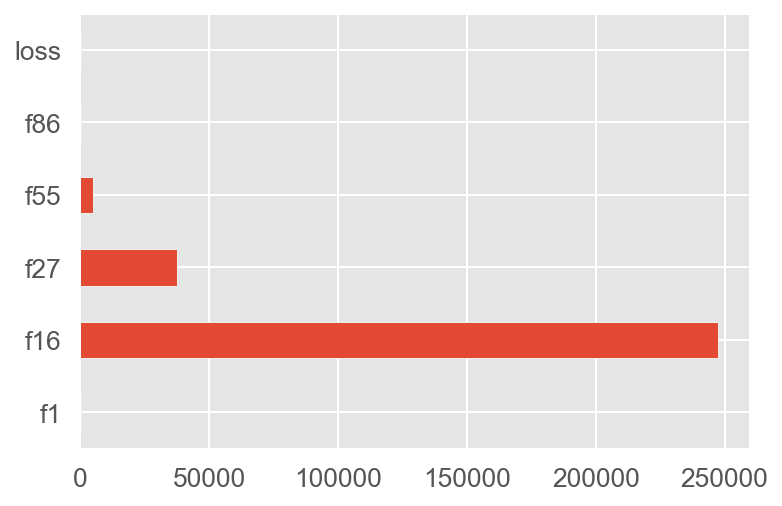

In [58]:
train[int_col].nunique().plot(kind = 'barh')

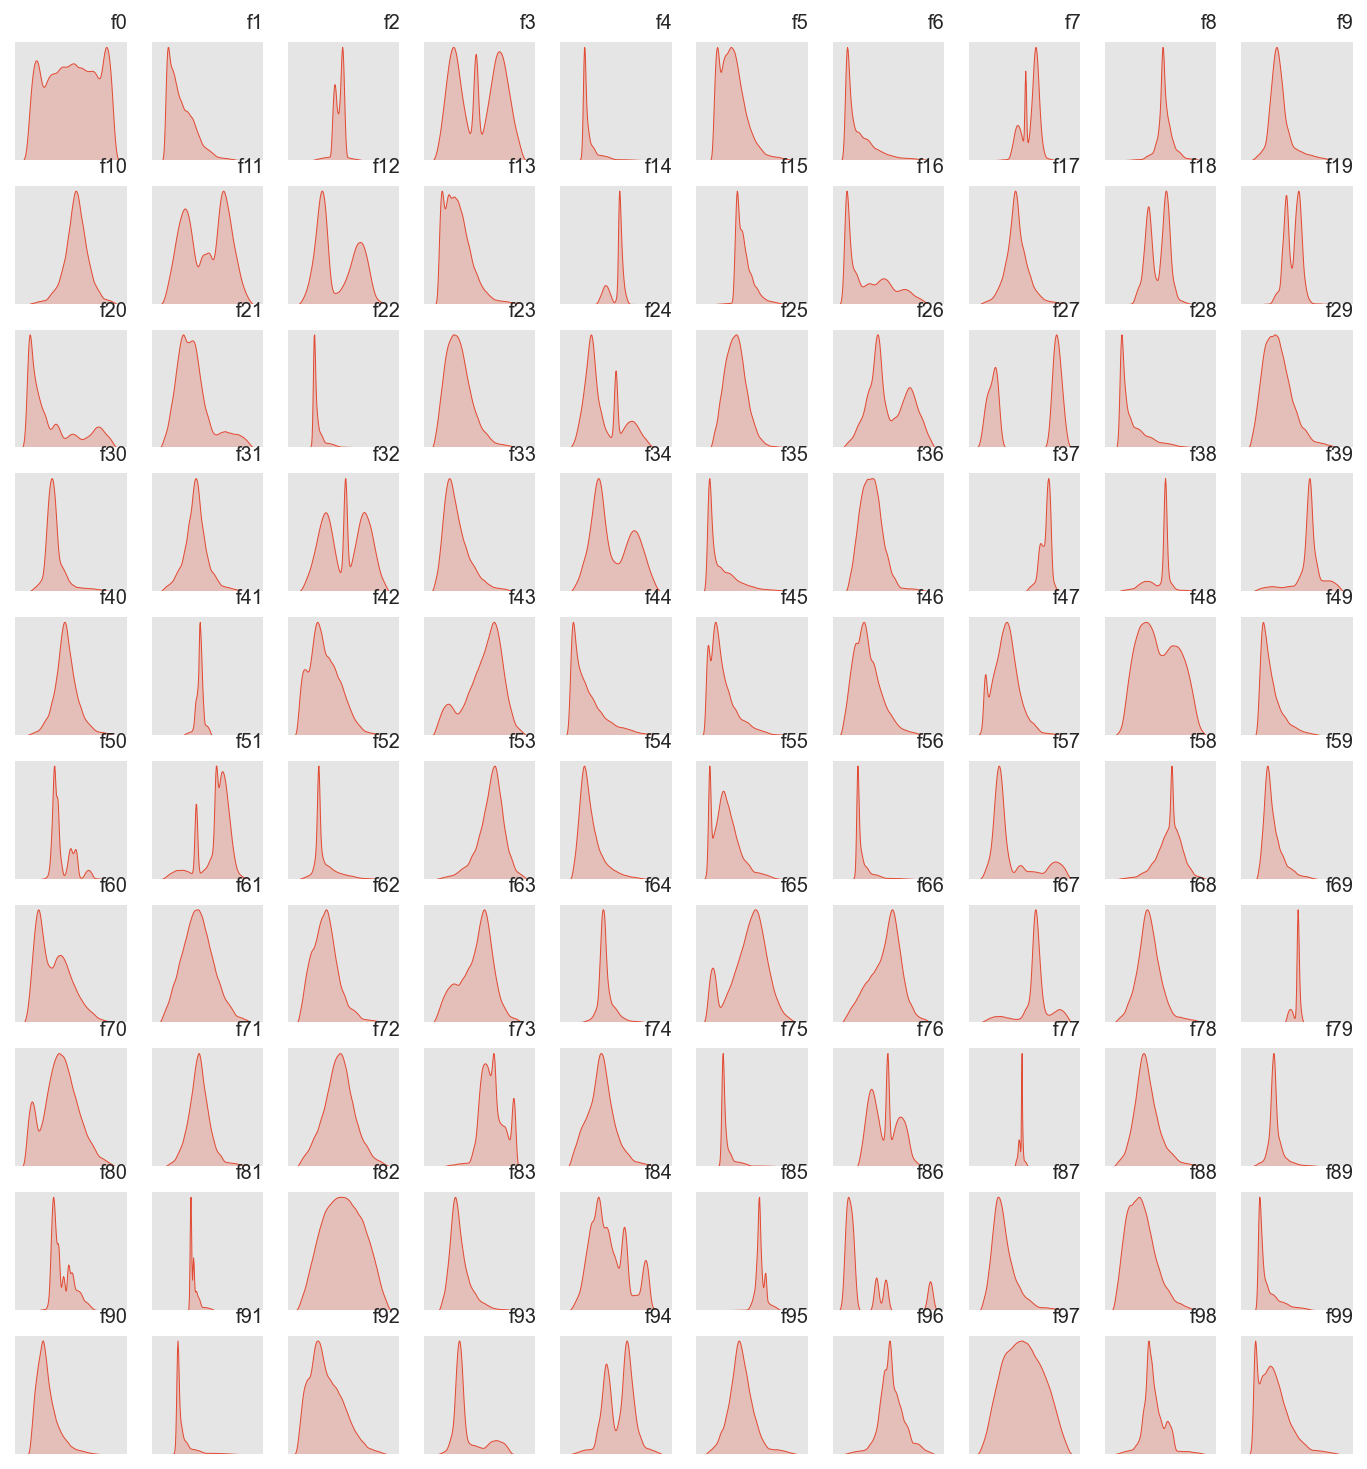

In [71]:
f, ax = plt.subplots(10,10,figsize = (12,13))
ax = ax.flatten()
for idx, ax in enumerate(ax):
    sns.kdeplot(data = train, x = f'f{idx}', fill = True, ax = ax)
    ax.set(xticks = [], yticks = [], xlabel = '', ylabel = '')
    ax.set_title(f'f{idx}', loc = 'right', fontsize = 10)

In [80]:
train['f49'].skew()

1.747614207890587

In [79]:
train['f72'].skew()

0.1402600148700454

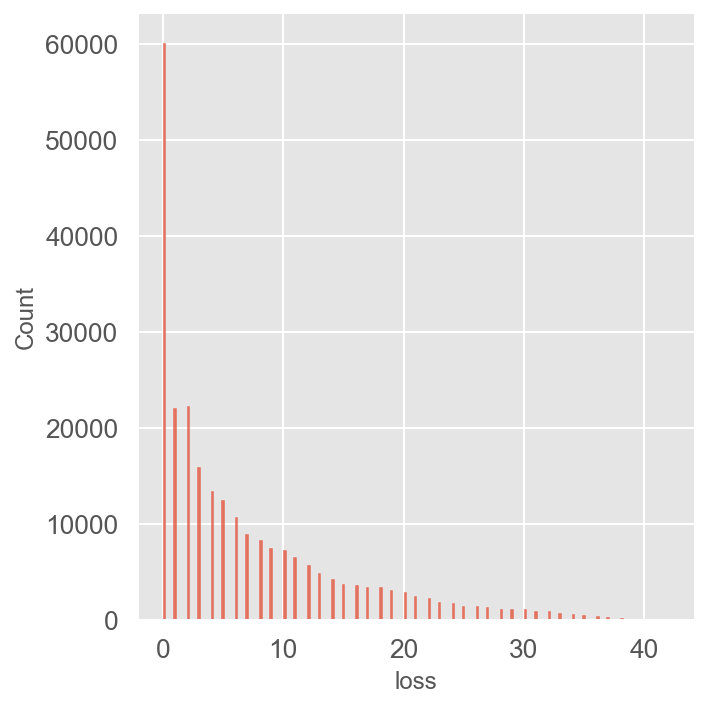

In [74]:
sns.displot(data = train['loss'])

In [87]:
X = train.iloc[:,:-1].values
y = train.iloc[:, -1].values

In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [90]:
preds = regressor.predict(test)

In [93]:
test.index += 250000

In [95]:
submission = pd.DataFrame({'id': test.index, 'loss': preds})
submission.to_csv('submission.csv',index = False)